<a href="https://colab.research.google.com/github/AnandMasurkar/Stock_Price_Prediction/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Price Prediction using Scikit-learn regression models

## Import Dependencies

In [0]:
# matrix multiplication and data-preprocessing
import numpy as np

# Data formating
import pandas as pd

# Plotting Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Minmax scalar
from sklearn.preprocessing import MinMaxScaler

#Train Test Split
from sklearn.model_selection import train_test_split

from sklearn import linear_model,utils
from sklearn.metrics import mean_squared_error,r2_score

Install yahoo finance dataset for MSFT

In [0]:
#!pip install yfinance --upgrade --no-cache-dir

In [3]:
## Save future files to your drive
## In this notebook control for multiple testing
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/Data/Stock_Price"

Mounted at /content/drive
/content/drive/My Drive/Data/Stock_Price


In [4]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("MSFT", start="2014-01-01").reset_index()
df_full.to_csv('MSFT.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,37.349998,37.400002,37.099998,37.160000,32.582050,30632200
1,2014-01-03,37.200001,37.220001,36.599998,36.910000,32.362835,31134800
2,2014-01-06,36.849998,36.889999,36.110001,36.130001,31.678938,43603700
3,2014-01-07,36.330002,36.490002,36.209999,36.410000,31.924446,35802800
4,2014-01-08,36.000000,36.139999,35.580002,35.759998,31.354523,59971700


In [0]:
df = pd.read_csv('MSFT.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,37.349998,37.400002,37.099998,37.160000,32.582050,30632200
1,2014-01-03,37.200001,37.220001,36.599998,36.910000,32.362835,31134800
2,2014-01-06,36.849998,36.889999,36.110001,36.130001,31.678938,43603700
3,2014-01-07,36.330002,36.490002,36.209999,36.410000,31.924446,35802800
4,2014-01-08,36.000000,36.139999,35.580002,35.759998,31.354523,59971700


## Data-preprocessing

### Drop Adj_Close

In [0]:
df.drop('Adj Close', axis=1, inplace=True)

### Drop Date

In [0]:
df.drop('Date', axis=1, inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume
0,37.349998,37.400002,37.099998,37.160000,30632200
1,37.200001,37.220001,36.599998,36.910000,31134800
2,36.849998,36.889999,36.110001,36.130001,43603700
3,36.330002,36.490002,36.209999,36.410000,35802800
4,36.000000,36.139999,35.580002,35.759998,59971700


### Seperate output column 'Close' to df_close

In [0]:
y_df = df['Close']

In [11]:
type(y_df)

pandas.core.series.Series

In [0]:
y_arry = y_df.values

In [13]:
type(y_arry)

numpy.ndarray

### Drop 'Close' column from original df

In [0]:
df.drop('Close', axis=1, inplace=True)

In [15]:
df.head()

,Open,High,Low,Volume
0,37.349998,37.400002,37.099998,30632200
1,37.200001,37.220001,36.599998,31134800
2,36.849998,36.889999,36.110001,43603700
3,36.330002,36.490002,36.209999,35802800
4,36.000000,36.139999,35.580002,59971700


### calculate min max scalar

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
x_arry = scaler.fit_transform(df)

In [17]:
type(x_arry)

numpy.ndarray

### Train Test split = 70 :30

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_arry,y_arry, test_size=0.3,random_state=42)

In [19]:
type(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous


In [20]:
x_train.shape

(1001, 4)

In [21]:
x_test.shape

(429, 4)

In [22]:
y_train.shape

(1001,)

In [23]:
y_test.shape

(429,)

# **LINEAR REGRESSION**









In [0]:
lin_reg = linear_model.LinearRegression()

In [25]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lin_reg.predict(x_test)

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [28]:
print("Root Mean squared error: %.2f" % rmse)
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 0.42
R2 score: 1.00


In [29]:
#Actual and Predicted values for Linear Regression
ypred_linear_regression = pd.DataFrame({'Prediction': pd.Series(y_pred)})
ytest_linear_regression = pd.DataFrame({'Actual': pd.Series(y_test)})
df_total_linear_regression = pd.concat([ytest_linear_regression , ypred_linear_regression], axis=1)
print(df_total_linear_regression)

         Actual  Prediction
0     41.700001   41.838151
1    114.669998  114.027725
2     53.240002   53.118064
3     47.610001   47.473300
4     87.110001   87.542234
5     57.889999   58.139764
6     62.580002   62.343987
7     50.160000   50.048496
8     39.180000   39.202141
9     54.349998   54.396483
10    49.060001   49.043381
11    85.580002   85.813159
12   115.610001  115.622101
13    89.389999   90.272700
14    40.970001   41.155449
15   115.910004  116.400351
16    48.779999   48.859953
17    39.910000   40.167970
18    42.009998   41.794950
19    39.549999   39.576961
20    40.470001   40.423589
21    45.910000   45.865554
22   107.580002  107.368295
23    51.160000   51.608805
24    39.689999   39.586498
25    48.299999   48.261634
26    46.040001   46.382287
27    64.269997   64.384536
28   106.959999  107.546140
29    72.519997   72.596087
..          ...         ...
399   93.639999   93.962761
400   84.879997   84.928207
401   45.330002   45.187727
402  102.800003  102

In [30]:
# Display model parameters
print('Slope = ', lin_reg.coef_)
print('Intercept = ', lin_reg.intercept_)

Slope =  [-69.12724631  87.88359409  86.43582157  -0.16008085]
Intercept =  35.633109489933815


In [0]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred.flatten(), 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

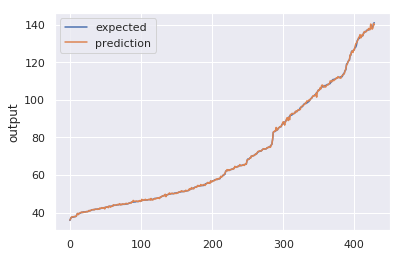

In [32]:
chart_regression(y_pred,y_test,sort=True)

# RIDGE REGRESSION

In [0]:
ridge_reg = linear_model.Ridge(alpha=.5)

In [34]:
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred = ridge_reg.predict(x_test)

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [37]:
print("Root Mean squared error: %.2f" % rmse)
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 0.61
R2 score: 1.00


In [38]:
#Actual and Predicted values for Linear Regression
ypred_ridge_reg = pd.DataFrame({'Prediction': pd.Series(y_pred)})
ytest_ridge_reg = pd.DataFrame({'Actual': pd.Series(y_test)})
df_total_ridge_reg = pd.concat([ytest_ridge_reg , ypred_ridge_reg], axis=1)
print(df_total_ridge_reg)

         Actual  Prediction
0     41.700001   42.129890
1    114.669998  113.291902
2     53.240002   53.024924
3     47.610001   47.188780
4     87.110001   86.963583
5     57.889999   58.095891
6     62.580002   62.667237
7     50.160000   51.060437
8     39.180000   39.255125
9     54.349998   53.900034
10    49.060001   48.859776
11    85.580002   85.491008
12   115.610001  115.001049
13    89.389999   89.833555
14    40.970001   41.223191
15   115.910004  115.506171
16    48.779999   48.798117
17    39.910000   40.233482
18    42.009998   41.257201
19    39.549999   38.783234
20    40.470001   40.259756
21    45.910000   46.123232
22   107.580002  107.274325
23    51.160000   51.437942
24    39.689999   39.953256
25    48.299999   48.694963
26    46.040001   46.738944
27    64.269997   64.214382
28   106.959999  106.213823
29    72.519997   72.413944
..          ...         ...
399   93.639999   92.960678
400   84.879997   84.413338
401   45.330002   45.163004
402  102.800003  102

In [39]:
# Display model parameters
print('Slope = ', ridge_reg.coef_)
print('Intercept = ', ridge_reg.intercept_)

Slope =  [32.05300784 36.32550546 37.33560878 -0.88058025]
Intercept =  35.33048661576947


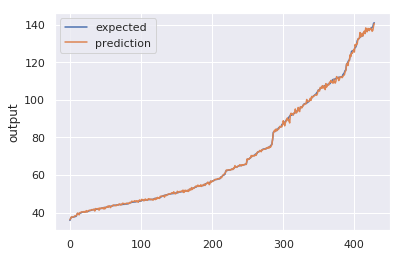

In [40]:
chart_regression(y_pred,y_test,sort=True)

# LASSO REGRESSION

In [0]:
lasso_reg = linear_model.Lasso(alpha=0.1)

In [42]:
lasso_reg.fit(x_train,y_train)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.63005585437145, tolerance: 81.08762204676704
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred = lasso_reg.predict(x_test)

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [45]:
print("Root Mean squared error: %.2f" % rmse)
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 0.78
R2 score: 1.00


In [46]:
#Actual and Predicted values for Linear Regression
ypred_lasso_reg = pd.DataFrame({'Prediction': pd.Series(y_pred)})
ytest_lasso_reg = pd.DataFrame({'Actual': pd.Series(y_test)})
df_total_lasso_reg = pd.concat([ytest_lasso_reg , ypred_lasso_reg], axis=1)
print(df_total_lasso_reg)

         Actual  Prediction
0     41.700001   42.406353
1    114.669998  112.930401
2     53.240002   53.154250
3     47.610001   47.453565
4     87.110001   86.603369
5     57.889999   58.012811
6     62.580002   62.658468
7     50.160000   51.881446
8     39.180000   39.549255
9     54.349998   54.079471
10    49.060001   49.137343
11    85.580002   85.164341
12   115.610001  114.201705
13    89.389999   89.883080
14    40.970001   41.523614
15   115.910004  115.224537
16    48.779999   48.876745
17    39.910000   40.730837
18    42.009998   41.791617
19    39.549999   39.402327
20    40.470001   40.527732
21    45.910000   46.350000
22   107.580002  106.697915
23    51.160000   51.516600
24    39.689999   40.240655
25    48.299999   48.964856
26    46.040001   47.093235
27    64.269997   64.125666
28   106.959999  106.310491
29    72.519997   72.183325
..          ...         ...
399   93.639999   92.682899
400   84.879997   84.084819
401   45.330002   45.347340
402  102.800003  102

In [47]:
# Display model parameters
print('Slope = ', lasso_reg.coef_)
print('Intercept = ', lasso_reg.intercept_)

Slope =  [43.49711077 53.39482252  7.44929526 -0.        ]
Intercept =  35.68235635868683


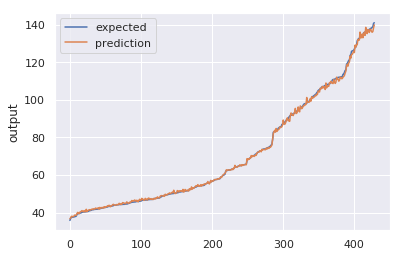

In [48]:
chart_regression(y_pred,y_test,sort=True)